# 二日目前半

# 確率分布を調べる

[a-1] まずはこれらの計算に必要となるPythonのモジュール（ライブラリ）をimportしましょう。
前回同様 numpy はpythonの数値計算のライブラリ，matplotlib.pyplotは グラフを作画するときに使います。
scipy の中の stats は今回統計計算をする際にお世話になります。

import (module名) as (短縮名) として，moduleを読み込み，本文の方では (短縮名) を使ってそのライブラリを使用しますよ，という宣言です。なので，以降 np.XXXX　とあれば，numpyの中のXXXXというmethod(関数のようなもの)を使いますという意味です。例えば np.sum と言えば，numpyで定義されているsumというメソッドを使います，ということです。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## 前準備
 [a-2] まずはこの後に共通で使うので，いくつかの関数（ここではプログラムの関数の意味）を定義しておきます。
関数に与える情報は1次元の$x$の値のリスト，例えば以下のx_setです。ここでは例として$x=10,20,40,50$
という4つの数字列を定義してみます。2行目は定義したx_setの中身を表示させています。

In [2]:
x_set=np.array([10,20,30,40,50])
x_set

array([10, 20, 30, 40, 50])

[a-3] 次に確率密度関数 $f(x)$（こちらはある$x$の値になる確率を表す，$0.0\le f(x)\le 1.0$)を定義します。ここでは例としてmfunc(x)という（数学の）関数が$x^2$に比例する形になっています。確率密度としての体裁に直すために，$x^2$の和で割って規格化しています（ここではx_setの中身が予め分かっているのでこのような規格化ができます。確率密度はすべての領域を積分すると1になります。）。

In [3]:
def mfunc(x):
    return x**2/(10**2+20**2+30**2+40**2+50**2)

[a-4] 以降の関数（プログラムの関数）に渡す情報は以下のように$X$という一つの変数に押し込みます。
ここでは($x$の値のリスト),(確率密度関数)という２つの情報をこの順番に詰めます。
一見全く異なる種類のものを詰め込んで
いますが，気にしないで下さい。そのように並べて渡しているというだけです。2行目で$X$の中身を表示しますが，array(配列)と関数が詰まっていることがわかります。

In [4]:
X=[x_set, mfunc]
X

[array([10, 20, 30, 40, 50]), <function __main__.mfunc(x)>]

## 共通に使う関数
### 平均
[a-5] まずは平均を取る関数です。$f(x)$が確率密度関数なので，$x\cdot f(x)$を全て足し上げれば平均が出ます。

In [5]:
def E(X):
    x_set, f=X # 関数の中で，Xの中身を x_set,f に展開する
    return np.sum([x_k*f(x_k) for x_k in x_set]) # x_setの各要素 x_k に渡り xf(x) を足し上げる

では早速使ってみましょう。

In [6]:
print("E(x) = %5.3F " % E(X) )

E(x) = 40.909 


合っているかどうか手計算と比べて確かめてみましょう

In [7]:
print("E(x) = %5.3F " % ((10*10**2+20*20**2+30*30**2+40*40**2+50*50**2)/(10**2+20**2+30**2+40**2+50**2)))

E(x) = 40.909 


どうやら合っているようです。

### 分散
[a-6] 次は分散を計算します。関数定義の中でE(x)も使います。

In [8]:
def V(X):
    x_set, f=X # 関数の中で，Xの中身を x_set,f に展開する
    mean = E(X) # 受け取ったXをそのままの形で E(X) に渡します
    return np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])   # (x-x0)^2 * f を足し上げます。

では使ってみましょう。

In [9]:
print("V(x) = %5.3F " % V(X) )

V(x) = 106.446 


これもちょっと面倒ですが確かめてみましょう。

In [10]:
print("E(x) = %5.3F " % (((10-E(X))**2*10**2+(20-E(X))**2*20**2+(30-E(X))**2*30**2+(40-E(X))**2*40**2+(50-E(X))**2*50**2)/(10**2+20**2+30**2+40**2+50**2)))

E(x) = 106.446 


どうやらよさそうです。

### plot関数
[a-7] やはり分布を目で確かめたいものです。次にプロットする関数を定義します。

In [14]:
def plot_prob(X):
    x_set, f=X   # 関数の中で，Xの中身を x_set,f に展開する
    prob = np.array([f(x_k) for x_k in x_set]) # 全てのxに対してf(x)を計算してprobという配列に詰めます
    
    # グラフを書く前のおまじない（2行）
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
 
    wid = (x_set.max()-x_set.min())/(x_set.size-1)*0.9
#    print("width = %f " % wid)
    
    ax.bar(x_set, prob, width=wid)

    ax.vlines(E(X),0,1,label='mean')  # x=平均の位置に垂直線を描きます
    ax.set_ylim(0, prob.max()*1.2)    # y軸の範囲をうまく調整します
    ax.legend() # 凡例を書きます
    
    #plt.show()


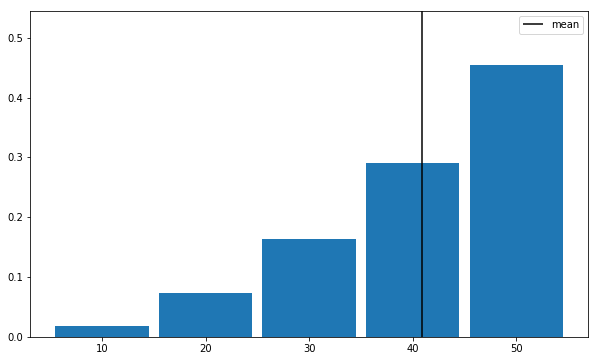

In [12]:
plot_prob(X)

平均の線が直観的な位置にあることが視覚で確認できました。

## 二項分布

[a-8] スライドでも説明しましたが二項分布とは，成功確率がある決まった大きさ$p\,$($0\le p \le 1$)でおきるような試行（例えばコイン投げであれば$p=0.5$）を$n$回行ったときその中で成功した回数$x$($x$は$0,1,2\cdots,n$の整数)が従う分布です。
${}_nC_xp^x(1-p)^{(n-x)}$の分布に従います。

In [15]:
from scipy.special import comb # 組み合わせ nCx を使うので comb を import

def Bin(n,p):
    x_set = np.arange(n+1) # nが与えられた数，arange(n+1)は0,1,2,..., "n"のリストを返す
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x) # 範囲にある場合だけ計算する
        else:
            return 0   # 範囲になければ 0 を返す 
    return x_set, f    # 数列と最後に関数fを並べて返します


では二項分布関数を呼んでみましょう。例として$n=7, p=0.3$で計算してみます（いろいろと試してみて下さい）。

In [31]:
myn=200
myp=0.3

X=Bin(myn,myp)
X

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

平均値，分散を計算してみます。

In [17]:
print('mean : %10.5f ' % E(X))

mean :    2.10000 


In [18]:
print('variance : %10.5f ' % V(X))

variance :    1.47000 


手計算と比べてどうでしょうか。二項分布の平均は$E=np$, 分散は$V=np(1-p)$です。

In [19]:
print('mean (manual) : %10.5f' % (myn*myp))

mean (manual) :    2.10000


In [20]:
print('variance (manual) : %10.5f' % (myn*myp*(1-myp)))

variance (manual) :    1.47000


分布はどうなっているでしょうか

NameError: name 'plot_prop' is not defined

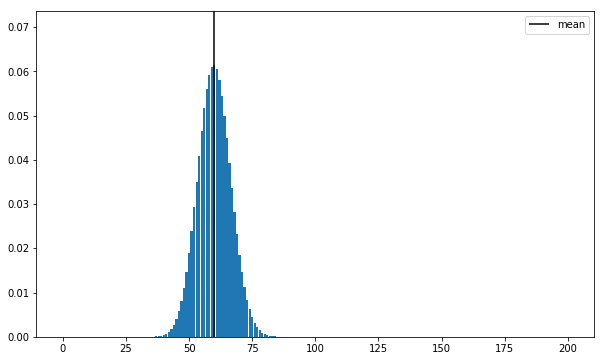

In [32]:
plot_prob(X)

自分で計算しないでもscipy.statsには2項分布関数，binomが用意されています。

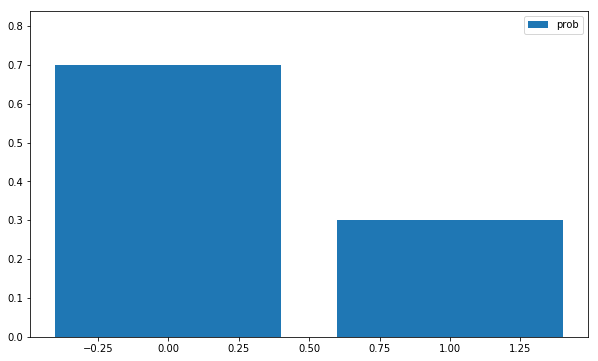

In [28]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(myn+1) # 0,1,・・,myn が範囲

rv=stats.binom(myn, myp) # 確率分布 rvを定義 (これはスムーズに連続した分布)
ax.bar(x_set, rv.pmf(x_set), label='prob') # pmfメソッドにリストx_setを与え，それぞれの確率を計算させます。
ax.set_ylim(0, rv.pmf(x_set).max()*1.2)    # y軸の範囲をうまく調整します(最大値の1.2倍)
ax.legend() # 凡例を書きます

## 実習 1
 
 他の様々な値を代入して試してみましょう。特に$n$を大きくした際にどうなるか見てみましょう。
 ($n=0$は定義外となります)
 
---

## ポワソン分布
[a-9] つぎはポワソン分布です。やり方はほとんど二項分布の場合と同じです。
期待値$\mu$と，plotの範囲$x_{max}$を与えます。

In [33]:
from scipy.special import factorial
import math
def Poisson(mu,xmax):
    x_set = np.arange(int(xmax))   # 整数を扱う
    def f(x):
        if x in x_set:
            # 累乗はnp.power(mu,x)とmath.pow(mu,x)とあるが，
            # 精度の関係からmath.powを使う。
            # factorialは階数 x
            calc = (math.pow(mu,x)/factorial(x))*math.exp(-mu)
            return calc
        else:
            return 0
    return x_set, f  # 数列と最後に関数fを並べて返します                  

まずは例として，$\mu=3$ plotの範囲 $x_{max}=10$として計算してみます。

In [49]:
mymu=5 # muの値をセット
myxmax=10  # xmaxの値をセット
X=Poisson(mymu,myxmax)

NameError: name 'plot_prop' is not defined

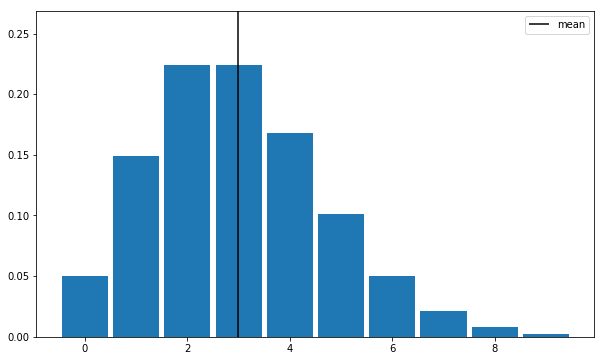

In [35]:
plot_prob(X)

[a-10] こちらも同様に，自分で計算しないでもscipy.statsにはポワソン分布関数poissonが用意されています。

pmf(Probability Mass Function: 確率質量関数)メソッドはとびとびの要素ごとのでやすさを返します。

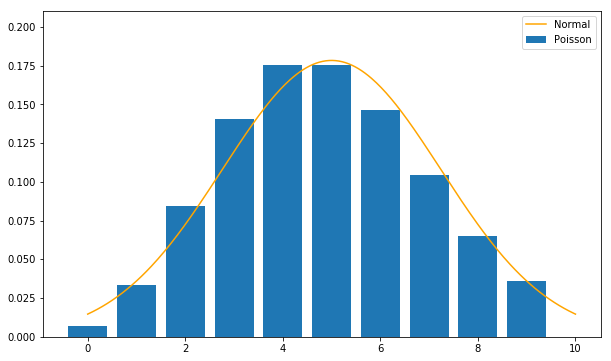

In [50]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(myxmax)
rv=stats.poisson(mymu) # 確率分布 rvを定義
ax.bar(x_set, rv.pmf(x_set), label='Poisson') # pmfメソッドにリストx_setを与え，それぞれの確率を計算させます。
ax.set_ylim(0, rv.pmf(x_set).max()*1.2)    # y軸の範囲をうまく調整します

# 正規分布関数を表示
rv_norm = stats.norm(mymu, np.sqrt(mymu))
xs = np.linspace(0,myxmax,300)
ax.plot(xs, rv_norm.pdf(xs), label="Normal", color='orange')

ax.legend() # 凡例を書きます

どうやら同じ絵になりました。
オレンジ色の曲線は，独立に平均$=\mu$, 標準偏差$=\sqrt{\mu}$の正規分布の確率密度分布関数を描いたものです。

## 実習2
他の様々な値を代入して試してみましょう。$\mu$を1以下の小数や0にした場合どうなるでしょうか？
その分布から何が考察できるでしょうか?

また，逆に$\mu$を大きくした場合はどうでしょうか。正規分布との一致具合も確認しましょう。

注意：$x_{max}$を大きくすると値が小さくなりすぎエラーがでますので気をつけて下さい。

---

# ここからは連続分布の話に移ります

## カイ二乗分布
[a-11] 自由度 $n$ のカイ二乗の分布を実際にサンプリングから求める場合は，標準正規分布（平均0，分散1）
から $n$ 個の値を無作為に抽出して足す，それを繰り返す，という手順で計算する必要があります。
その計算はやや手間なのでここではやりません。代わりには scipy.stats がもっている確率密度関数 chi2 を用います。

pdf(probability density function: 確率密度関数)といって確率の分布を表します。

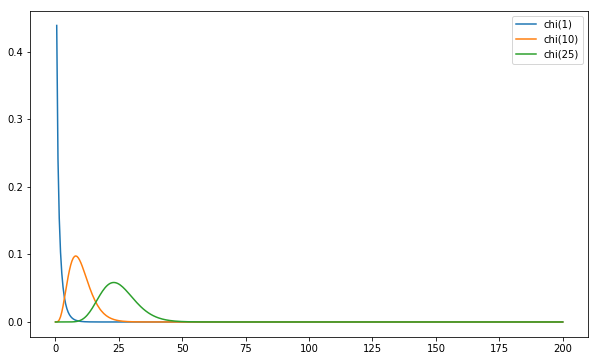

In [58]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

n1 = 1 # 自由度（degree of freedom）
n2 = 10
n3 = 25


rv1=stats.chi2(n1) # 確率分布 rv1を定義
rv2=stats.chi2(n2) # 確率分布 rv2を定義
rv3=stats.chi2(n3) # 確率分布 rv3を定義

xs=np.linspace(0,200,400)  # x=0-200の間を400等分した値のリスト

ax.plot(xs, rv1.pdf(xs), label='chi('+str(n1)+')') # pdfメソッドにリストxsを与え，それぞれの確率を計算させます。
ax.plot(xs, rv2.pdf(xs), label='chi('+str(n2)+')') 
ax.plot(xs, rv3.pdf(xs), label='chi('+str(n3)+')') 

ax.legend() # 凡例を書きます

## 実習３
一見，正規分布のように見えますが $n$を小さくしていくと左右非対称になるのが分かります。
$n=1,2$では最大値は$x=0$になり，$n=3$からはピークが$x=0$から離れます。なぜだか分かりますか？ 

---

## t分布と正規分布の比較
[a-12] t分布はt検定で用いるので，ここでその形を確認しておきましょう。詳しい話はスライドを参照して下さい。
自由度$n$のt分布と，正規分布を比較してみます。

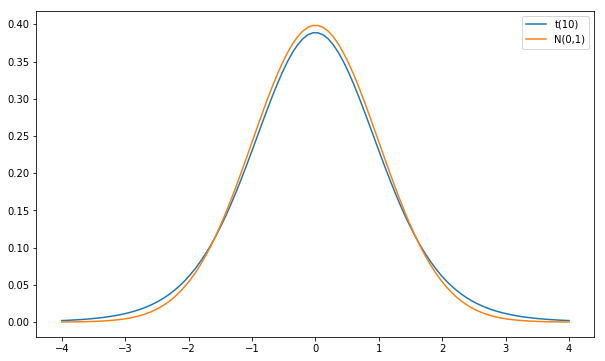

In [67]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs=np.linspace(-4,4,100)  # x=[-4,+4]の間を100等分した値のリスト

#==================================
n=10 # t分布の自由度(書き換えましょう)
#==================================

rv_t=stats.t(n)   # 自由度 n の t分布 確率分布 rv_tを定義

rv_n=stats.norm() # 正規分布 確率分布 rv_nを定義 (初期値を与えてないので，平均=0, 標準偏差=1)

ax.plot(xs, rv_t.pdf(xs), label='t('+str(n)+')')  # t分布の表示
ax.plot(xs, rv_n.pdf(xs), label='N(0,1)')         # 正規分布の表示

ax.legend() # 凡例の表示 

## 実習４
正規分布とt分布の差が顕著になるのは$n$がいくつくらいからであろうか。
いろいろな値を自分で試してみて確認せよ。

---

## 大数の法則の確認
[a-13] 大数の法則の意味合いについてはスライド資料の説明で学んで下さい。ここでは実際にその効果を乱数シミュレーションで確認してみましょう。大数の法則により，自然界がもともともっている分布がなんであれ，ある程度のサンプリング平均を繰り返すと正規分布が得られることになります。

ここでは極端な例として指数関数という関数を用います。正規分布とは全く異なる形をしています。
その指数関数に従う乱数を発生させて，実際の実験や調査のように無作為にサンプリングをして，平均を求めます。そのサンプリングを繰り返します。

まずは元になる指数関数を定義して形を確認します。$f(x)=\frac{1}{A}e^{-x/A}$という関数で，$x=A$のところで，高さが$1/e=0.368$まで下がります。

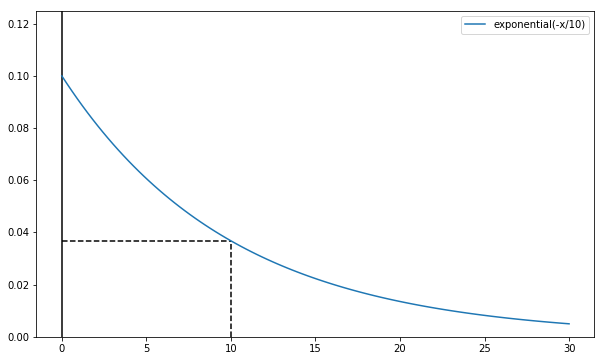

In [69]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

myA = 10 # 指数関数の平均値に相当するパラメータ

rv = stats.expon(loc=0, scale=myA) # loc: x方向の基準点，scale: 平均値

xs=np.linspace(0,30,100)  # x=[0,30]の間を100等分した値のリスト

ax.plot(xs, rv.pdf(xs), label='exponential(-x/'+str(myA)+')')
ax.set_ylim(0, 0.125)

ax.vlines(0,0.0,0.125)
ax.vlines(10,0.0,0.0368,linestyle='dashed')     # 垂直ダッシュライン
ax.hlines(0.0368, 0.0, 10.0,linestyle='dashed') # 水平ダッシュライン
ax.legend()



[a-14] では，実際にサンプリングをしてみましょう。初期値は一回の調査で１つのサンプルしかとらないこと(sampling_n=1)
に設定しています，サンプル数が1なので，平均をとるとその1サンプルの値そのものになります（後の実習ではいろいろと変えてみて下さい）。当然，その調査を繰り返せば，もとの分布が得られます。一緒に描かれているオレンジ色のラインについてはグラフの下の説明を見て下さい。

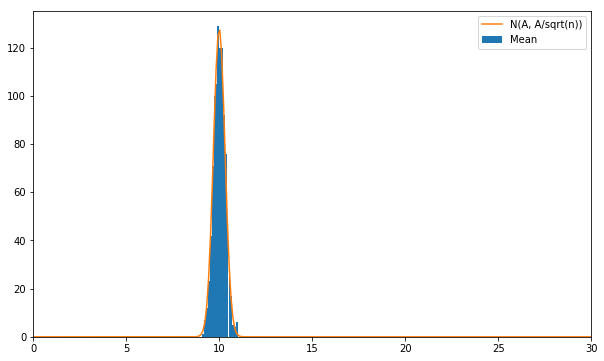

In [75]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

# 上と同じような指数関数を定義
myA = 10
rv = stats.expon(loc=0, scale=myA)

#=== 書き換える場所 ======================================================
sampling_n = 1024    # 1回のサンプリングで取る個数(初期値 1)
sampling_size = int(1e3) # 何回サンプリングを取るか  1e3 = 10^3
#=======================================================================


# サンプリングを表示
sample_array = rv.rvs((sampling_n, sampling_size)) # sampling_n * sampling_sizeの行列を作成

means_of_samplings = np.mean(sample_array, axis=0) # 1次元方向に各サンプルの平均値を計算

ax.hist(means_of_samplings, bins=300, range=(0,30),label='Mean')

# 正規分布関数を表示
rv_norm = stats.norm(myA, myA/np.sqrt(sampling_n))

xs = np.linspace(0,30,300)
norm_sum = np.sum(rv_norm.pdf(xs)) # 各点で関数の大きさを計算して足し上げる

shape = (sampling_size / norm_sum ) * rv_norm.pdf(xs) # 関数の高さをサンプル分布に合わせる
ax.plot(xs, shape, label="N(A, A/sqrt(n))")

ax.set_xlim(0,30)
ax.legend()

[a-15] 指数関数$f(x)=\frac{1}{A}e^{-x/A}$の平均値は A, 標準偏差も Aです。
大数の法則によると，この「平均値の集団」の分布はサンプリング一度当たりのサンプル数を増やすと，
正規分布に近づきます。その正規分布の平均値は，もとの分布の平均値に近づき（この場合はA）,
標準偏差$\sigma$は１回当たりのサンプリングの回数が$n$(上記sampling_n)のとき，もとの分布の標準偏差(この場合はA)を$\sqrt{n}$で割ったものになります。

図のオレンジの曲線は，この予測された正規分布を描いたものです。高さはサンプリング調査の調査回数(sampling_size)を用いて合わせてあります。幅は $A/\sqrt{n}$ で計算したものです。

## 実習５
sampling_n の値を大きくして，分布が正規分布になることを確認しましょう。また，分布の幅が，予想で求めた幅と一致することを確認しましょう（頻度分布とオレンジの線が一致するか）。
sampling_n を $10, 100, 400, 1600$ と変化させてゆき，分布が説明できるかどうかを確認しましょう。